# Amenity Detection and inventory Tracking Using Detectron2
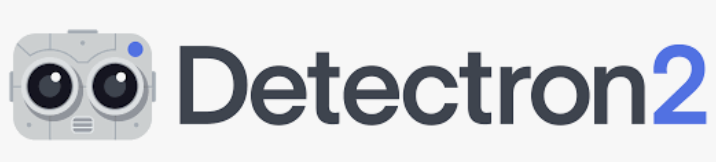

# System Set up



In [1]:
import sys, os, distutils.core
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# Check GPU, First Go to Runtime, Change runtime Type, and change it to GPU
!nvidia-smi

Mon Nov  6 03:13:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Download images (DO NOT RUN)


## Download Images from Google

In [ ]:
! pip install simple_image_download

In [ ]:
from simple_image_download import simple_image_download as sid
data = sid.simple_image_download
data().download(keywords= "Airbnb house swimming pool", limit  = 1000)

# Install Pytorch and Detectron2

In [3]:
!pip install pyyaml==6.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0.1
    Uninstalling PyYAML-6.0.1:
      Successfully uninstalled PyYAML-6.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


In [4]:
!pip install torch==1.13.0+cu116 torchvision==0.14.1+cu116 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 65.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install torch==1.13.0+cu116 and torchvision==0.14.1+cu116 because these package versions have conflicting dependencies.

The conflict is caused by:
    The user requested torch==1.13.0+cu116
    torchvision 0.14.1+cu116 depends on torch==1.13.1

To fix this you could try to:
1. loosen the range of package versions you've specified
2. remove package versions to allow pip attempt to solve the dependency conflict

ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/topics/dependency-resolution/#dealing-with-dependency-conflicts


In [5]:
! python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'


  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-9soqkn9z
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-9soqkn9z
  Resolved https://github.com/facebookresearch/detectron2.git to commit 337ca3490fa7879ceeeadf6c2b73d67504ff4b4f
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for detectron2: filename=detectron2-0.6-cp310-cp310-linux_x86_64.whl size=6118643 sha256=e3fd30cfcf3f1c8b0636417b8edf8

# Import Libraries

In [6]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
torch:  2.1 ; cuda:  cu118
detectron2: 0.6


In [7]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

In [8]:
import numpy as np
import json
import random
import matplotlib.pyplot as plt
from detectron2.structures import BoxMode
from detectron2.data import DatasetCatalog, MetadataCatalog




#**Uplaod Data from Drive**

In [ ]:
DATA_SET_NAME = "amenities"
ANNOTATION_FILE_NAME = "_annotations.coco.json"
DATASET_LOCATION = '/content/drive/MyDrive/DATA298A/dataset/'

#**Upload Dataset from Roboflow**

In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2OsTOLKc6WoGIISlKkST")
project = rf.workspace("sjsu-ri0ao").project("new-vky75")
dataset = project.version(1).download("coco-segmentation")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Found existing

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to new-1 in coco-segmentation:: 100%|██████████| 6522/6522 [00:01<00:00, 3417.04it/s]


In [10]:
DATA_SET_NAME = dataset.name.replace(" ","-")
ANNOTATION_FILE_NAME = "_annotations.coco.json"
DATASET_LOCATION = dataset.location

#**Start Registering Data**

In [11]:
from detectron2.data.datasets import register_coco_instances
#Train set
TRAIN_DATA_SET_NAME = f"{DATA_SET_NAME}-train"
TRAIN_DATA_SET_IMAGES_DIR_PATH = os.path.join(DATASET_LOCATION,"train")
TRAIN_DATA_SET_ANN_FILE_PATH = os.path.join(DATASET_LOCATION,"train",ANNOTATION_FILE_NAME)

register_coco_instances(
    name = TRAIN_DATA_SET_NAME,
    metadata ={},
    json_file = TRAIN_DATA_SET_ANN_FILE_PATH,
    image_root = TRAIN_DATA_SET_IMAGES_DIR_PATH
)

#Test set
TEST_DATA_SET_NAME = f"{DATA_SET_NAME}-test"
TEST_DATA_SET_IMAGES_DIR_PATH = os.path.join(DATASET_LOCATION,"test")
TEST_DATA_SET_ANN_FILE_PATH = os.path.join(DATASET_LOCATION,"test",ANNOTATION_FILE_NAME)

register_coco_instances(
    name = TEST_DATA_SET_NAME,
    metadata ={},
    json_file = TEST_DATA_SET_ANN_FILE_PATH,
    image_root = TEST_DATA_SET_IMAGES_DIR_PATH
)

#Valid set
VALID_DATA_SET_NAME = f"{DATA_SET_NAME}-valid"
VALID_DATA_SET_IMAGES_DIR_PATH = os.path.join(DATASET_LOCATION,"valid")
VALID_DATA_SET_ANN_FILE_PATH = os.path.join(DATASET_LOCATION,"valid",ANNOTATION_FILE_NAME)

register_coco_instances(
    name = VALID_DATA_SET_NAME,
    metadata ={},
    json_file = VALID_DATA_SET_ANN_FILE_PATH,
    image_root = VALID_DATA_SET_IMAGES_DIR_PATH
)

In [12]:
[data_set for data_set in MetadataCatalog.list() if data_set.startswith(DATA_SET_NAME)]

['new-train', 'new-test', 'new-valid']

#Visualize

WARNING [11/06 03:18:54 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/06 03:18:54 d2.data.datasets.coco]: Loaded 5689 images in COCO format from /content/new-1/train/_annotations.coco.json


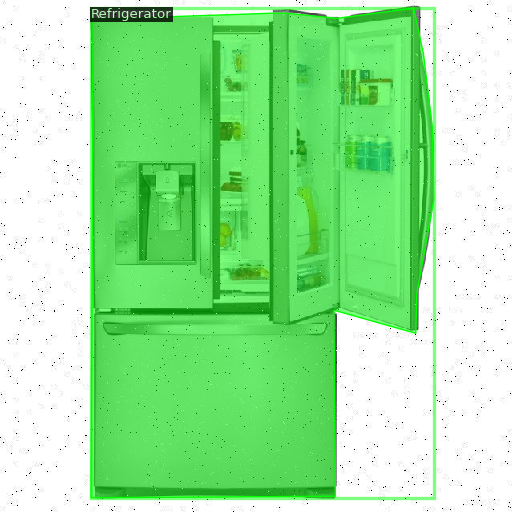

In [13]:
from detectron2.utils.visualizer import Visualizer
metadata = MetadataCatalog.get(TRAIN_DATA_SET_NAME)
dataset_train = DatasetCatalog.get(TRAIN_DATA_SET_NAME)

dataset_entry = dataset_train[1000]
image= cv2.imread(dataset_entry["file_name"])

v = Visualizer(image[:, :, ::-1], metadata, scale=0.8)

out = v.draw_dataset_dict(dataset_entry)
cv2_imshow(out.get_image()[:, :, ::-1])
#out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
#cv2_imshow(out.get_image()[:, :, ::-1])

# Training The Detectron2 segmentation model

In [14]:
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import ColorMode, Visualizer
from datetime import datetime

In [15]:
ARCHITECTURE = "mask_rcnn_R_101_FPN_3x"
CONFIG_FILE_PATH = f"COCO-InstanceSegmentation/{ARCHITECTURE}.yaml"
MAX_ITER = 20000 ### was 10000
EVAL_PAERIO = 100
CHECKPOINT_PERIOD = 500
BASE_LR = 0.001  #0.00025
NUM_CLASSES = 33 ####

OUTPUT_DIR_PATH = os.path.join(DATA_SET_NAME, ARCHITECTURE, datetime.now().strftime('%Y-$m-%d-%H-$M-%S'))

os.makedirs(OUTPUT_DIR_PATH, exist_ok = True)

In [16]:
cfg= get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(CONFIG_FILE_PATH))
cfg.MODEL_WEIGHTS = model_zoo.get_checkpoint_url (CONFIG_FILE_PATH)

cfg.DATASETS.TRAIN= (TRAIN_DATA_SET_NAME,)
cfg.DATASETS.VAL = (VALID_DATA_SET_NAME,)
cfg.DATASETS.TEST = () ########### TEST

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 32 # change to 32 and 64
cfg.TEST.EVAL_PERIOD = EVAL_PAERIO
cfg.SOLVER.CHECKPOINT_PERIOD = CHECKPOINT_PERIOD ##### save model
cfg.DATALOADER.NUM_WORKERS = 2

cfg.SOLVER.IMS_PER_BATCH = 2 #4
cfg.INPUT.MASK_FORMAT = 'bitmask'
cfg.SOLVER.BASE_LR = BASE_LR

cfg.SOLVER.MAX_ITER = MAX_ITER

cfg.MODEL.ROI_HEADS.NUM_CLASSES= NUM_CLASSES
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7 ### was 0.8

cfg.OUTPUT_DIR = OUTPUT_DIR_PATH

## **Create Loss Function for Train vs. Validation**

In [17]:
from detectron2.engine import HookBase
from detectron2.data import build_detection_train_loader
import detectron2.utils.comm as comm



class ValidationLoss(HookBase):
    def __init__(self, cfg):
        super().__init__()
        self.cfg = cfg.clone()
        self.cfg.DATASETS.TRAIN = cfg.DATASETS.VAL
        self._loader = iter(build_detection_train_loader(self.cfg))

    def after_step(self):
        data = next(self._loader)
        with torch.no_grad():
            loss_dict = self.trainer.model(data)

            losses = sum(loss_dict.values())
            assert torch.isfinite(losses).all(), loss_dict

            loss_dict_reduced = {"val_" + k: v.item() for k, v in
                                 comm.reduce_dict(loss_dict).items()}
            losses_reduced = sum(loss for loss in loss_dict_reduced.values())
            if comm.is_main_process():
                self.trainer.storage.put_scalars(total_val_loss=losses_reduced,
                                                 **loss_dict_reduced)

## **Training**

In [18]:
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
val_loss = ValidationLoss(cfg)
trainer.register_hooks([val_loss])
# swap the order of PeriodicWriter and ValidationLoss
trainer._hooks = trainer._hooks[:-2] + trainer._hooks[-2:][::-1]
trainer.resume_or_load(resume=False)
trainer.train()



[11/06 03:18:56 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

R-101.pkl: 179MB [00:01, 95.4MB/s]                          


[11/06 03:18:59 d2.checkpoint.c2_model_loading]: Renaming Caffe2 weights ......
[11/06 03:18:59 d2.checkpoint.c2_model_loading]: Following weights matched with submodule backbone.bottom_up - Total num: 105


backbone.fpn_lateral2.{bias, weight}
backbone.fpn_lateral3.{bias, weight}
backbone.fpn_lateral4.{bias, weight}
backbone.fpn_lateral5.{bias, weight}
backbone.fpn_output2.{bias, weight}
backbone.fpn_output3.{bias, weight}
backbone.fpn_output4.{bias, weight}
backbone.fpn_output5.{bias, weight}
proposal_generator.rpn_head.anchor_deltas.{bias, weight}
proposal_generator.rpn_head.conv.{bias, weight}
proposal_generator.rpn_head.objectness_logits.{bias, weight}
roi_heads.box_head.fc1.{bias, weight}
roi_heads.box_head.fc2.{bias, weight}
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.deconv.{bias, weight}
roi_heads.mask_head.mask_fcn1.{bias, weight}
roi_heads.mask_head.mask_fcn2.{bias, weight}
roi_heads.mask_head.mask_fcn3.{bias, weight}
roi_heads.mask_head.mask_fcn4.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}
  fc1000.{bias, weight}


[11/06 03:18:59 d2.engine.train_loop]: Starting training from iteration 0


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)


[11/06 03:19:16 d2.utils.events]:  eta: 2:19:42  iter: 19  total_loss: 4.447  loss_cls: 3.03  loss_box_reg: 0.05673  loss_mask: 0.693  loss_rpn_cls: 0.6513  loss_rpn_loc: 0.02401  total_val_loss: 4.297  val_loss_cls: 2.876  val_loss_box_reg: 0.06183  val_loss_mask: 0.6932  val_loss_rpn_cls: 0.657  val_loss_rpn_loc: 0.01399    time: 0.4153  last_time: 0.4074  data_time: 0.0144  last_data_time: 0.0041   lr: 1.9981e-05  max_mem: 2414M
[11/06 03:19:31 d2.utils.events]:  eta: 2:17:06  iter: 39  total_loss: 2.589  loss_cls: 0.916  loss_box_reg: 0.3471  loss_mask: 0.6929  loss_rpn_cls: 0.6055  loss_rpn_loc: 0.02805  total_val_loss: 2.327  val_loss_cls: 0.7928  val_loss_box_reg: 0.191  val_loss_mask: 0.6914  val_loss_rpn_cls: 0.6153  val_loss_rpn_loc: 0.01667    time: 0.4169  last_time: 0.4152  data_time: 0.0053  last_data_time: 0.0052   lr: 3.9961e-05  max_mem: 2418M
[11/06 03:19:43 d2.utils.events]:  eta: 2:17:40  iter: 59  total_loss: 2.668  loss_cls: 0.8996  loss_box_reg: 0.398  loss_mask:

##  Plot Train vs. Validation

In [ ]:
import torch
from detectron2.engine import DefaultPredictor

# Assuming you have a trained Detectron2 model loaded in the 'predictor' variable
# predictor = ...

# Save the model to a file using torch.save()

model_name = 'detectron2_model_20000iter.pth'
path = F"/content/gdrive/MyDrive/DATA298A/{model_name}"

torch.save(trainer.model.state_dict(), path)


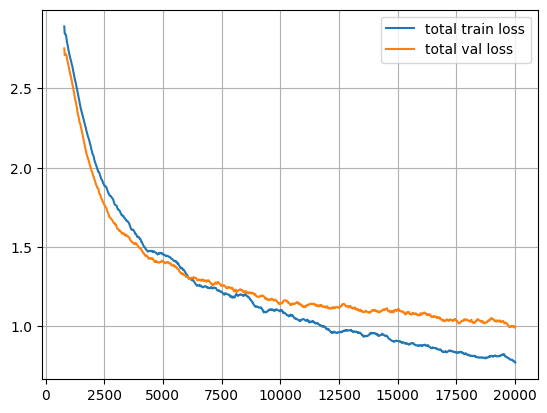

In [19]:
import ast
import json

import matplotlib.pyplot as plt
import numpy as np


def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


metrics_file = OUTPUT_DIR_PATH+'/metrics.json'

with open(metrics_file, 'r') as f:
    metrics = [ast.literal_eval(l[:-1]) for l in f.readlines()]
    f.close()

train_loss = [float(v['total_loss']) for v in metrics if 'total_loss' in v.keys()]
val_loss = [float(v['total_val_loss']) for v in metrics if 'total_val_loss' in v.keys()]

N = 40

train_loss_avg = moving_average(train_loss, n=N)
val_loss_avg = moving_average(val_loss, n=N)

plt.plot(range(20 * N - 1, 20 * len(train_loss), 20), train_loss_avg, label='total train loss')
plt.plot(range(20 * N - 1, 20 * len(train_loss), 20), val_loss_avg, label='total val loss')
plt.legend()
plt.grid()
plt.show()

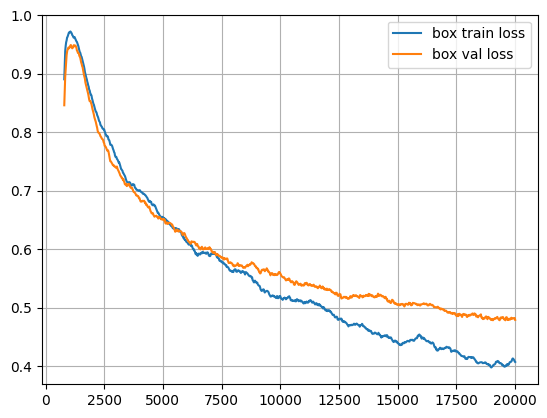

In [ ]:
import ast
import json

import matplotlib.pyplot as plt
import numpy as np


def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


metrics_file = OUTPUT_DIR_PATH+'/metrics.json'

with open(metrics_file, 'r') as f:
    metrics = [ast.literal_eval(l[:-1]) for l in f.readlines()]
    f.close()

train_loss = [float(v['loss_box_reg']) for v in metrics if 'loss_box_reg' in v.keys()]
val_loss = [float(v['val_loss_box_reg']) for v in metrics if 'val_loss_box_reg' in v.keys()]

N = 40

train_loss_avg = moving_average(train_loss, n=N)
val_loss_avg = moving_average(val_loss, n=N)

plt.plot(range(20 * N - 1, 20 * len(train_loss), 20), train_loss_avg, label='box train loss')
plt.plot(range(20 * N - 1, 20 * len(train_loss), 20), val_loss_avg, label='box val loss')
plt.legend()
plt.grid()
plt.show()

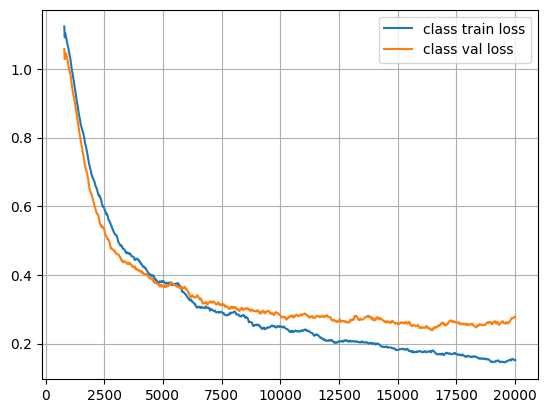

In [ ]:
import ast
import json

import matplotlib.pyplot as plt
import numpy as np


def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


metrics_file = OUTPUT_DIR_PATH+'/metrics.json'

with open(metrics_file, 'r') as f:
    metrics = [ast.literal_eval(l[:-1]) for l in f.readlines()]
    f.close()

train_loss = [float(v['loss_cls']) for v in metrics if 'loss_cls' in v.keys()]
val_loss = [float(v['val_loss_cls']) for v in metrics if 'val_loss_cls' in v.keys()]

N = 40

train_loss_avg = moving_average(train_loss, n=N)
val_loss_avg = moving_average(val_loss, n=N)

plt.plot(range(20 * N - 1, 20 * len(train_loss), 20), train_loss_avg, label='class train loss')
plt.plot(range(20 * N - 1, 20 * len(train_loss), 20), val_loss_avg, label='class val loss')
plt.legend()
plt.grid()
plt.show()

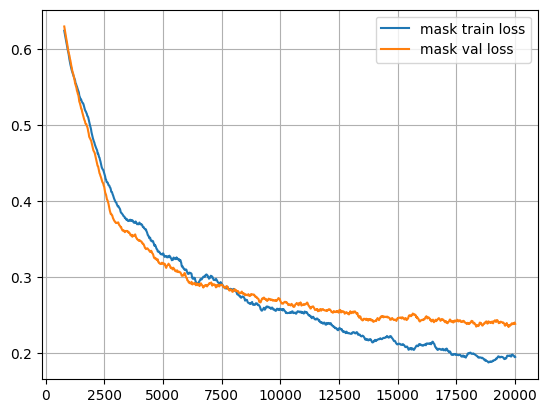

In [ ]:
import ast
import json

import matplotlib.pyplot as plt
import numpy as np


def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n


metrics_file = OUTPUT_DIR_PATH+'/metrics.json'

with open(metrics_file, 'r') as f:
    metrics = [ast.literal_eval(l[:-1]) for l in f.readlines()]
    f.close()

train_loss = [float(v['loss_mask']) for v in metrics if 'loss_mask' in v.keys()]
val_loss = [float(v['val_loss_mask']) for v in metrics if 'val_loss_mask' in v.keys()]

N = 40

train_loss_avg = moving_average(train_loss, n=N)
val_loss_avg = moving_average(val_loss, n=N)

plt.plot(range(20 * N - 1, 20 * len(train_loss), 20), train_loss_avg, label='mask train loss')
plt.plot(range(20 * N - 1, 20 * len(train_loss), 20), val_loss_avg, label='mask val loss')
plt.legend()
plt.grid()
plt.show()

#**Save the model and Tensor board**



#**Tensor Board**

In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard - -logdir $OUTPUT_DIR_PATH

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2023-11-03 06:30:52.453099: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-03 06:30:52.453178: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-03 06:30:52.453206: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-03 06:30:53.541578: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC] [--host ADDR]
                   [--bind_all] [--port PORT] [--reuse_port BOOL] [--loa

#**Test Model**

In [ ]:
#torch.save(trainer.state_dict(), "model_final.pth")
#cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.WEIGHTS = '/content/gdrive/MyDrive/DATA298A/detectron2_model_20000iter.pth'
# cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/model_final_68b088.pkl"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.75


In [ ]:
predictor = DefaultPredictor(cfg)

[11/03 05:36:53 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/gdrive/MyDrive/DATA298A/detectron2_model_20000iter.pth ...


WARNING [11/03 05:36:54 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/03 05:36:54 d2.data.datasets.coco]: Loaded 279 images in COCO format from /content/new-1/test/_annotations.coco.json


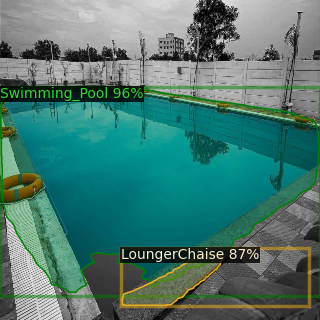

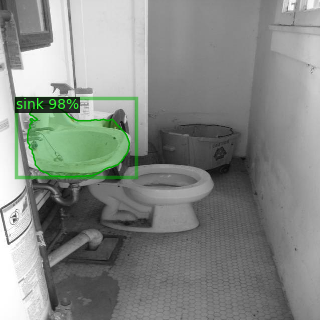

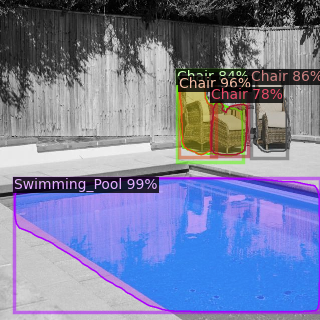

In [ ]:
from detectron2.utils.visualizer import ColorMode
dataset_valid = DatasetCatalog.get(TEST_DATA_SET_NAME)
for d in random.sample(dataset_valid, 3):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=MetadataCatalog.get(TRAIN_DATA_SET_NAME),
                   scale=0.5,
                   instance_mode= ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])


In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator(TEST_DATA_SET_NAME, output_dir=cfg.OUTPUT_DIR)
val_loader = build_detection_test_loader(cfg, TEST_DATA_SET_NAME)
print(inference_on_dataset(predictor.model, val_loader, evaluator))
# another equivalent way to evaluate the model is to use `trainer.test`

WARNING [11/03 05:37:09 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[11/03 05:37:09 d2.data.datasets.coco]: Loaded 279 images in COCO format from /content/new-1/test/_annotations.coco.json
[11/03 05:37:09 d2.data.build]: Distribution of instances among all 33 categories:
|  category   | #instances   |   category    | #instances   |   category    | #instances   |
|:-----------:|:-------------|:-------------:|:-------------|:-------------:|:-------------|
|  Amenities  | 0            |    B-Hoop     | 7            |      BBQ      | 9            |
|   Bathtub   | 12           | Billiards t.. | 8            |    Blender    | 14           |
|    Chair    | 38           |  Coffemaker   | 15           |     Couch     | 31           |
|    Crib     | 10           |  Dish Washer  | 16           |   Fireplace   | 13           |
| Hair dryer  | 8            |    Jacuzzi    | 8            | LoungerChaise | 26           |
|  Micr